# Analysis functions

In [30]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math
from src.utilities import time_to_seconds, slc, get_average_curve
from src.modeling import model_cascade, model_one_step, model_two_step, model_three_step, residuals, fit_model
#Standardized color scheme for plotting
color_scheme = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                               '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
#Global plotting parameters
alph = 0.5
size = 5
line = 2

# Rate constant for R1nn

## Natural no MM

Fitted kf: 420057.2067250735
Error:  19384.009035133895



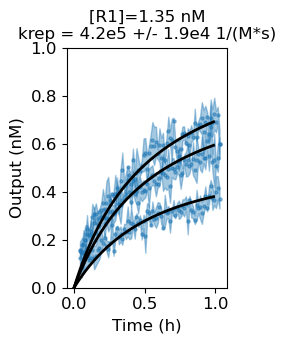

In [31]:
data_dir = "Data/"
data1 = pd.read_csv(data_dir + "UW_Rep_NoMM_kinetics.csv")[0:80]

RT = 0.593

conditions = {'F2t_S2_5nM: 0.47 nM, R1_S2_50nM: 1.25 nM' : ['B5', 'C5', 'D5'],
'F2t_S2_5nM: 0.78 nM, R1_S2_50nM: 1.25 nM' : ['B7', 'C7', 'D7'],
'F2t_S2_5nM: 0.94 nM, R1_S2_50nM: 1.25 nM' : ['B8', 'C8', 'D8']}


#Best fit: Fluorescence = 1099.85 * [F2t(nM)] + 322.2
x1 = [time_to_seconds(i) for i in list(data1['Time'].values)]



fit1 = [126.85, 464.25]


start = time_to_seconds("0:00:00")
offset1 = 150




levels = list(conditions.keys())

format_dict = {'point_size': 10, 'point_opacity': 0.2, 'fill_opacity': 0.4}



curves = []
stdDev = []
for i,level in enumerate(levels):
    curves += [[get_average_curve(start, offset1, level, x1, data1, conditions, fit1)[0],[np.array(c) for c in get_average_curve(start, offset1, level, x1, data1, conditions, fit1)[1]]]]
    stdDev += [get_average_curve(start, offset1, level, x1, data1, conditions, fit1)[2]]


to_fit = [c[1] for c in curves]

x_trunc1 = curves[0][0]

# Convert time from seconds to hours for plotting
x_th = [i/3600 for i in x_trunc1]
x_h = [i/3600 for i in x1]



dG = [-.12,-.27,-.34]
scale = 1.35


# Initial parameters

y_init1 = [
    0.0,  # Initial concentration of P   (0)
    0.47,  # Initial concentration of Y1  (1)
    0.0,  # Initial concentration of F1t (2)
]

y_init2 = [
    0.0,  # Initial concentration of P   (0)
    0.78,  # Initial concentration of Y1  (1)
    0,  # Initial concentration of F1t (2)
]

y_init3 = [
    0.0,  # Initial concentration of P   (0)
    0.94,  # Initial concentration of Y1  (1)
    0,  # Initial concentration of F1t (2)
]



fixed_params_list = [
    {'y0': y_init1, 'scale' : scale},
    {'y0': y_init2, 'scale' : scale},
    {'y0': y_init3, 'scale' : scale}]


initial_k = 2e5

inits = [y_init1, y_init2, y_init3]
x_list = [x_trunc1, x_trunc1, x_trunc1]
fits = []
for out in range(3):
  inds = list(range(len(fixed_params_list[0:3])))
  inds.remove(out)

  fixed = slc(fixed_params_list[0:3], inds)
  x = slc(x_list[0:3], inds)
  fitting = slc(to_fit[0:3], inds)
  res = fit_model(model_one_step, x, fitting, initial_k, fixed)
  fits += [res[0]]


res = np.array(fits).flatten()
kf_mean = np.mean(fits)
n = len(fits)
kf_se = np.sqrt((n - 1) / n * np.sum((fits - kf_mean)**2))
fitted_kf = kf_mean
error = kf_se

print("Fitted kf:", fitted_kf)
print('Error: ', error)

print()


krep_nat = fitted_kf

plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(1,1, figsize = (2,3))
fig.subplots_adjust(hspace=0.5)
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)



for i in range(0,len(fixed_params_list)):
    curve = np.array([np.array(c) for c in curves[i][1]])
    std = np.array(stdDev[i])
    ax.plot(x_h,[i for i in model_one_step(fitted_kf, x1, fixed_params_list[i])], color='black', linewidth=line)
    ax.scatter(x_th, curve, color = color_scheme[0], s = size, alpha = alph)
    ax.fill_between(x_th,(curve - std),(curve + std),color = color_scheme[0], alpha = 0.4)

ax.set_xlabel('Time (h)')
ax.set_ylabel('Output (nM)')
ax.set_ylim(0,1.0)

ax.set_title(f"[R1]={scale} nM\nkrep = {round(fitted_kf*1e-5,1)}e5 +/- {round(error*1e-4,1)}e4 1/(M*s)", fontsize=12)

plt.savefig('Figures/R1_noMM_new.svg', dpi = 600, transparent=True)

plt.show()

## NN No mm

Fitted kf: 1380444.6646749496
Error:  45916.2624656235



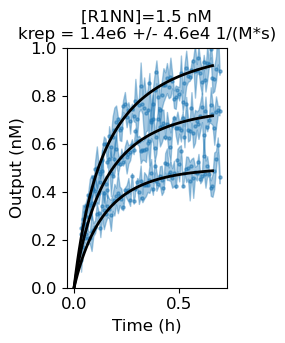

In [33]:
data1 = pd.read_csv(data_dir + "UW_RepNN_NoMM_kinetics.csv")[0:80]
RT = 0.593
offset1 = 120
conditions = {
'F2nnt_100nM: 0.5 nM, R1nn_100nM: 1.69 nM' : ['H3', 'I3', 'J3'],
'F2nnt_100nM: 0.75 nM, R1nn_100nM: 1.69 nM' : ['H4', 'I4', 'J4'],
'F2nnt_100nM: 1.0 nM, R1nn_100nM: 1.69 nM' : ['H5', 'I5', 'J5'],
              }


#Best fit: Fluorescence = 1099.85 * [F2t(nM)] + 322.2
x1 = [time_to_seconds(i) for i in list(data1['Time'].values)]

fit1 = [73.66, 425.42]


start = time_to_seconds("0:00:00")





levels = list(conditions.keys())

format_dict = {'point_size': 10, 'point_opacity': 0.2, 'fill_opacity': 0.4}



curves = []
stdDev = []
for i,level in enumerate(levels):
    curves += [[get_average_curve(start, offset1, level, x1, data1, conditions, fit1)[0],[np.array(c) for c in get_average_curve(start, offset1, level, x1, data1, conditions, fit1)[1]]]]
    stdDev += [get_average_curve(start, offset1, level, x1, data1, conditions, fit1)[2]]


to_fit = [c[1] for c in curves]

x_trunc = curves[0][0]

# Convert time from seconds to hours for plotting
x_th = [i/3600 for i in x_trunc]
x_h = [i/3600 for i in x1]




#[Reporter] (nM)
scale = 1.5


# Initial parameters


y_init1 = [
    0.0,  # Initial concentration of P   (0)
    0.5,  # Initial concentration of Y1  (1)
    0,  # Initial concentration of W (2)

]

y_init2 = [
    0.0,  # Initial concentration of P   (0)
    0.75,  # Initial concentration of Y1  (1)
    0,  # Initial concentration of W (2)

]

y_init3 = [
    0.0,  # Initial concentration of P   (0)
    1.00,  # Initial concentration of Y1  (1)
    0,  # Initial concentration of W (2)
]






fixed_params_list = [
    {'y0': y_init1, 'scale':scale},
    {'y0': y_init2, 'scale':scale},
    {'y0': y_init3, 'scale':scale}]

initial_k = 4e5

inits = [y_init1, y_init2, y_init3]
x_list = [x_trunc, x_trunc, x_trunc]
fits = []
for out in range(3):
  inds = list(range(len(fixed_params_list[0:3])))
  inds.remove(out)

  fixed = slc(fixed_params_list[0:3], inds)
  x = slc(x_list[0:3], inds)
  fitting = slc(to_fit[0:3], inds)
  res = fit_model(model_one_step, x, fitting, initial_k, fixed)
  fits += [res[0]]

res = np.array(fits).flatten()
kf_mean = np.mean(fits)
n = len(fits)
kf_se = np.sqrt((n - 1) / n * np.sum((fits - kf_mean)**2))
fitted_kf = kf_mean
error = kf_se

print("Fitted kf:", fitted_kf)
print('Error: ', error)

print()

krep_nn = fitted_kf

plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(1,1, figsize = (2,3))
fig.subplots_adjust(hspace=0.5)
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)


for i in range(0,len(fixed_params_list)):
    curve = np.array([np.array(c) for c in curves[i][1]])
    std = np.array(stdDev[i])
    ax.plot(x_h,[i for i in model_one_step(fitted_kf, x1, fixed_params_list[i])], color='black', linewidth=line)
    ax.scatter(x_th, curve, color = color_scheme[0], s = size, alpha = alph)
    ax.fill_between(x_th,(curve - std),(curve + std),color = color_scheme[0], alpha = 0.4)


ax.set_xlabel('Time (h)')
ax.set_ylabel('Output (nM)')
ax.set_ylim(0,1.0)

ax.set_title(f"[R1NN]={scale} nM\nkrep = {round(fitted_kf*1e-6,1)}e6 +/- {round(error*1e-4,1)}e4 1/(M*s)", fontsize=12)

plt.savefig('Figures/R1NN_NoMM.svg', dpi = 600, transparent=True)
plt.show()


## Mismatch rate constant

Fitted kf: 25158.9674363415
Error:  147.94847872458143



/Users/cse-loaner/Documents/Thachuk-Lab/Projects/ThomasMayerVisit2022/NAR_Analysis_Code/src/modeling.py:38: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  y1 = [i[0] for i in odeint(onestep_model, y0, t, args=(kf, scale), rtol = 1e-12, atol = 1e-12)]


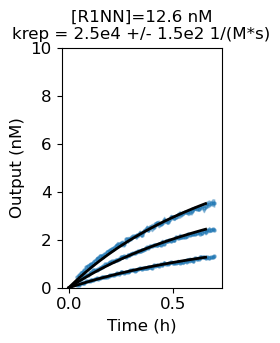

In [35]:
data1 = pd.read_csv(data_dir + "UW_RepNN_MM_Kinetics.csv")[0:80]

RT = 0.593



#Best fit: Fluorescence = 1099.85 * [F2t(nM)] + 322.2
x1 = [time_to_seconds(i) for i in list(data1['Time'].values)]


fit1 = [358.71, 1443.5]



start = time_to_seconds("0:00:00")
offset1 = 150


conditions = {
'F2t_1uM: 2.5 nM, R1nn_1uM: 12.69 nM' : ['E13', 'F13', 'G13'],
'F2t_1uM: 5.0 nM, R1nn_1uM: 12.69 nM' : ['E14', 'F14', 'G14'],
'F2t_1uM: 7.5 nM, R1nn_1uM: 12.69 nM' : ['E15', 'F15', 'G15'],
}





levels = list(conditions.keys())

format_dict = {'point_size': 10, 'point_opacity': 0.2, 'fill_opacity': 0.4}



curves = []
stdDev = []
for i,level in enumerate(levels):
    curves += [[get_average_curve(start, offset1, level, x1, data1, conditions, fit1)[0],[np.array(c) for c in get_average_curve(start, offset1, level, x1, data1, conditions, fit1)[1]]]]
    stdDev += [get_average_curve(start, offset1, level, x1, data1, conditions, fit1)[2]]


to_fit = [np.array(c[1]) for c in curves]
x_trunc1 = curves[0][0]

# Convert time from seconds to hours for plotting
x_th = [i/3600 for i in x_trunc1]
x_h = [i/3600 for i in x1]



dG = [-.12,-.27,-.34]
scale = 12.6


# Initial parameters


y_init1 = [
    0.0,  # Initial concentration of P   (0)
    2.5,  # Initial concentration of Y1  (1)
    0.0,  # Initial concentration of F1t (2)
]

y_init2 = [
    0.0,  # Initial concentration of P   (0)
    5.0,  # Initial concentration of Y1  (1)
    0,  # Initial concentration of F1t (2)
]

y_init3 = [
    0.0,  # Initial concentration of P   (0)
    7.5,  # Initial concentration of Y1  (1)
    0,  # Initial concentration of F1t (2)
]



fixed_params_list = [

    {'y0': y_init1, 'scale' : scale},
    {'y0': y_init2, 'scale' : scale},
    {'y0': y_init3, 'scale' : scale}]


initial_k = 4e5

x_list = [x_trunc1, x_trunc1, x_trunc1]

fits = []
for out in range(len(fixed_params_list)):
  inds = list(range(len(fixed_params_list)))
  inds.remove(out)

  fixed = slc(fixed_params_list[0:], inds)
  x = slc(x_list[0:], inds)
  fitting = slc(to_fit[0:], inds)
  res = fit_model(model_one_step, x, fitting, initial_k, fixed)
  fits += [res[0]]


res = np.array(fits).flatten()
kf_mean = np.mean(fits)
n = len(fits)
kf_se = np.sqrt((n - 1) / n * np.sum((fits - kf_mean)**2))
fitted_kf = kf_mean
error = kf_se

print("Fitted kf:", fitted_kf)
print('Error: ', error)
krep_nat_nn_mm = fitted_kf


print()


plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(1,1, figsize = (2,3))
fig.subplots_adjust(hspace=0.5)
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)


for i in range(0,len(fixed_params_list)):
    curve = np.array([np.array(c) for c in curves[i][1]])
    std = np.array(stdDev[i])
    ax.plot(x_h,[i for i in model_one_step(fitted_kf, x1, fixed_params_list[i])], color='black', linewidth=line)
    ax.scatter(x_th, curve, color = color_scheme[0], s = size, alpha = alph)
    ax.fill_between(x_th,(curve - std),(curve + std),color = color_scheme[0], alpha = 0.4)



ax.set_xlabel('Time (h)')
ax.set_ylabel('Output (nM)')
ax.set_ylim(0,10)

ax.set_title(f"[R1NN]={scale} nM\nkrep = {round(fitted_kf*1e-4,1)}e4 +/- {round(error*1e-2,1)}e2 1/(M*s)", fontsize=12)

plt.savefig('Figures/R1NN_MM.svg', dpi = 600, transparent=True)
plt.show()



# Natural cascade

### F2 Level

Fitted kf: 892181.7819175553
Error:  168545.39974133417


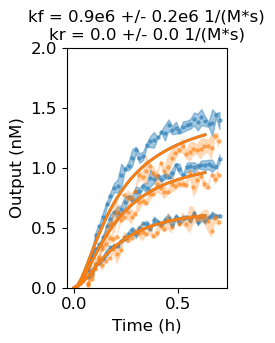

In [36]:
data1 = pd.read_csv(data_dir + "UW_CascadeModel_Natural_Trial1.csv", index_col=0)[0:37]
data2 = pd.read_csv(data_dir + "UW_CascadeModel_Natural_Trial2.csv", index_col=0)[0:37]

RT = 0.592

#Best fit: Fluorescence = 1099.85 * [F2t(nM)] + 322.2
x1 = [time_to_seconds(i) for i in list(data1['Time'].values)]
x2 = [time_to_seconds(i) for i in list(data2['Time'].values)]

# from calibration curves collected for each reporter during the same experiment
fit1 = [624.49, 1751.13]
fit2 = [294.56, 581.53]


start = time_to_seconds("0:00:00")
offset1 = 250
offset2 = 240


conditions = {'F1mmt_100nM: 0.64 nM, F2mm_lowStock: 1.8 nM, R1_S2_500nM: 5.0 nM' : ['J20', 'K20', 'L20'],
'F1mmt_100nM: 1.06 nM, F2mm_lowStock: 1.8 nM, R1_S2_500nM: 5.0 nM' : ['J21', 'K21', 'L21'],
'F1mmt_100nM: 1.49 nM, F2mm_lowStock: 1.8 nM, R1_S2_500nM: 5.0 nM' : ['J22', 'K22', 'L22']}


levels = list(conditions.keys())
format_dict = {'point_size': 10, 'point_opacity': 0.2, 'fill_opacity': 0.4}


curves = []
stdDev = []

for i,level in enumerate(levels):
    curves += [[get_average_curve(start, offset1, level, x1, data1, conditions, fit1)[0],[1e-9*np.array(c) for c in get_average_curve(start, offset1, level, x1, data1, conditions, fit1)[1]]]]
    stdDev += [get_average_curve(start, offset1, level, x1, data1, conditions, fit1)[2]]


for i,level in enumerate(levels):
    curves += [[get_average_curve(start, offset2, level, x2, data2, conditions, fit2)[0],[1e-9*np.array(c) for c in get_average_curve(start, offset2, level, x2, data2, conditions, fit2)[1]]]]
    stdDev += [get_average_curve(start, offset2, level, x2, data2, conditions, fit2)[2]]

to_fit = [c[1] for c in curves]
x_trunc1 = curves[0][0]
x_trunc2 = curves[4][0]

# Convert time from seconds to hours for plotting
x_th1 = [i/3600 for i in x_trunc1]
x_h1 = [i/3600 for i in x1]
x_th2 = [i/3600 for i in x_trunc2]
x_h2 = [i/3600 for i in x2]


dG = [-9.96,-10.11,-10.19]
scale = 12

f2c1 = 2.0
f2c2 = 2.0


# Initial parameters


y_init1 = [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    0.64,  # Initial concentration of F1t (2)
    f2c1,  # Initial concentration of F2. (5)
    0.0   # Initial concentration of W2. (10)
]

y_init2 = [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    1.06,  # Initial concentration of F1t (2)
    f2c1,  # Initial concentration of F2. (5)
    0.0   # Initial concentration of W2. (10)
]

y_init3 = [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    1.49,  # Initial concentration of F1t (2)
    f2c1,  # Initial concentration of F2. (5)
    0.0   # Initial concentration of W2. (10)
]


y_init5 = [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    0.64,  # Initial concentration of F1t (2)
    f2c2,  # Initial concentration of F2. (5)
    0.0   # Initial concentration of W2. (10)
]

y_init6 = [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    1.06,  # Initial concentration of F1t (2)
    f2c2,  # Initial concentration of F2. (5)
    0.0   # Initial concentration of W2. (10)
]

y_init7 = [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    1.49,  # Initial concentration of F1t (2)
    f2c2,  # Initial concentration of F2. (5)
    0.0   # Initial concentration of W2. (10)
]

krep = krep_nat
dGi = dG[2]

fixed_params_list = [
    {'y0': y_init1, 'krep': krep,'scale':scale, 'dG' : dGi},
    {'y0': y_init2, 'krep': krep,  'scale':scale, 'dG' : dGi},
    {'y0': y_init3, 'krep': krep,  'scale':scale, 'dG' : dGi},
    {'y0': y_init5, 'krep': krep,'scale':scale, 'dG' : dGi},
    {'y0': y_init6, 'krep': krep,  'scale':scale, 'dG' : dGi},
    {'y0': y_init7, 'krep': krep,  'scale':scale, 'dG' : dGi}

]
initial_k = 2e5

inits = [y_init1, y_init2, y_init3, y_init5, y_init6, y_init7]
x_list = [x_trunc1, x_trunc1, x_trunc1, x_trunc2, x_trunc2, x_trunc2]
    
fits = []
for out in range(len(fixed_params_list)):
  inds = list(range(len(fixed_params_list)))
  inds.remove(out)

  fixed = slc(fixed_params_list[0:6], inds)
  x = slc(x_list[0:6], inds)
  fitting = slc(to_fit[0:6], inds)
  res = fit_model(model_two_step, x, fitting, initial_k, fixed)
  fits += [res[0]]

res = np.array(fits).flatten()
kf_mean = np.mean(fits)
n = len(fits)
kf_se = np.sqrt((n - 1) / n * np.sum((fits - kf_mean)**2))
fitted_kf = kf_mean
error = kf_se
r_error = error/(math.exp(-dGi/RT))

fitted_kr =  fitted_kf / np.exp(-dGi/(0.592))
print("Fitted kf:", fitted_kf)
print('Error: ', error)

kf2mm = fitted_kf
kr2mm = fitted_kr

plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(1,1, figsize = (2,3))
fig.subplots_adjust(hspace=0.5)
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)


for i in range(0,len(fixed_params_list)//2):
    curve = np.array([1e9*np.array(c) for c in curves[i][1]])
    std = np.array(stdDev[i])
    ax.plot(x_h1,[i*1e9 for i in model_two_step(fitted_kf, x1, fixed_params_list[i])], color=color_scheme[0], linewidth=line)
    ax.scatter(x_th1, curve, color = color_scheme[0], s = size, alpha = alph)
    ax.fill_between(x_th1,(curve - std),(curve + std),color = color_scheme[0], alpha = 0.4)
for i in range(len(fixed_params_list)//2,len(fixed_params_list)):
    curve = np.array([1e9*np.array(c) for c in curves[i][1]])
    std = np.array(stdDev[i])
    ax.plot(x_h2,[i*1e9 for i in model_two_step(fitted_kf, x2, fixed_params_list[i])], color = color_scheme[1], linewidth=line)
    ax.scatter(x_th2,curve, color = color_scheme[1], s=size, alpha = alph)
    ax.fill_between(x_th2,(curve - std), (curve + std), color = color_scheme[1], alpha=.3, edgecolor=None)



ax.set_xlabel('Time (h)')
ax.set_ylabel('Output (nM)')
ax.set_ylim(0,2.0)

ax.set_title(f"kf = {round(fitted_kf*1e-6,1)}e6 +/- {round(error*1e-6,1)}e6 1/(M*s)\nkr = {round(fitted_kr*1e0,1)} +/- {round(r_error*1e0,1)} 1/(M*s)", fontsize=12)

plt.savefig('Figures/F2(mm)Detailed.svg', dpi = 600, transparent=True)
plt.show()


### F1 level

Fitted kf: 1838784.365262267
Error:  674847.153435932


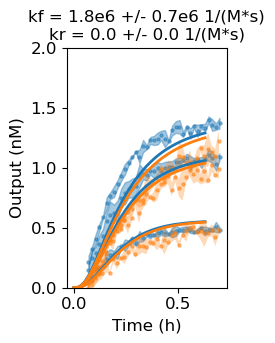

In [37]:
data1 = pd.read_csv(data_dir + "UW_CascadeModel_Natural_Trial1.csv")[0:37]
data2 = pd.read_csv(data_dir + "UW_CascadeModel_Natural_Trial2.csv")[0:37]

RT = 0.593


#Best fit: Fluorescence = 1099.85 * [F2t(nM)] + 322.2
x1 = [time_to_seconds(i) for i in list(data1['Time'].values)]
x2 = [time_to_seconds(i) for i in list(data2['Time'].values)]


# from calibration curves collected for each reporter during the same experiment
fit1 = [624.49, 1751.13]
fit2 = [294.56, 581.53]


start = time_to_seconds("0:00:00")
offset1 = 250
offset2 = 240






conditions = {
'F0mmt_100nM: 0.56 nM, F1mm_lowStock: 1.96 nM, F2mm_lowStock: 3.6 nM, R1_S2_500nM: 5.0 nM' : ['M15', 'N15', 'O15'],
'F0mmt_100nM: 1.11 nM, F1mm_lowStock: 1.96 nM, F2mm_lowStock: 3.6 nM, R1_S2_500nM: 5.0 nM' : ['M16', 'N16', 'O16'],
'F0mmt_100nM: 1.39 nM, F1mm_lowStock: 1.96 nM, F2mm_lowStock: 3.6 nM, R1_S2_500nM: 5.0 nM' : ['M17', 'N17', 'O17'],
}


levels = list(conditions.keys())

format_dict = {'point_size': 10, 'point_opacity': 0.2, 'fill_opacity': 0.4}



curves = []
stdDev = []
for i,level in enumerate(levels):
    curves += [[get_average_curve(start, offset1, level, x1, data1, conditions, fit1)[0],[1e-9*np.array(c) for c in get_average_curve(start, offset1, level, x1, data1, conditions, fit1)[1]]]]
    stdDev += [get_average_curve(start, offset1, level, x1, data1, conditions, fit1)[2]]


for i,level in enumerate(levels):
    curves += [[get_average_curve(start, offset2, level, x2, data2, conditions, fit2)[0],[1e-9*np.array(c) for c in get_average_curve(start, offset2, level, x2, data2, conditions, fit2)[1]]]]
    stdDev += [get_average_curve(start, offset2, level, x2, data2, conditions, fit2)[2]]

to_fit = [c[1] for c in curves]
x_trunc1 = curves[0][0]
x_trunc2 = curves[3][0]

# Convert time from seconds to hours for plotting
x_th1 = [i/3600 for i in x_trunc1]
x_h1 = [i/3600 for i in x1]
x_th2 = [i/3600 for i in x_trunc2]
x_h2 = [i/3600 for i in x2]

dG = [-9.96,-10.11,-10.19]

scale = 12

f2c1 = 2.0
f2c2 = 2.0

f1c1 = 2.0
f1c2 = 1.8



# Initial parameters


y_init1 = [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    0.0,  # Initial concentration of F1t (2)
    0.56,  # Initial concentration of F0t (3)
    2*f2c1,  # Initial concentration of F2. (5)
    f1c1,  # Initial concentration of F1. (6)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]

y_init2 = [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    0.0,  # Initial concentration of F1t (2)
    1.11,  # Initial concentration of F0t (3)
    2*f2c1,  # Initial concentration of F2. (5)
    f1c1,  # Initial concentration of F1. (6)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]

y_init3 = [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    0.0,  # Initial concentration of F1t (2)
    1.39,  # Initial concentration of F0t (3)
    2*f2c1,  # Initial concentration of F2. (5)
    f1c1,  # Initial concentration of F1. (6)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]

y_init5 = [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    0.0,  # Initial concentration of F1t (2)
    0.56,  # Initial concentration of F0t (3)
    2*f2c2,  # Initial concentration of F2. (5)
    f1c2,  # Initial concentration of F1. (6)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]

y_init6= [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    0.0,  # Initial concentration of F1t (2)
    1.11,  # Initial concentration of F0t (3)
    2*f2c2,  # Initial concentration of F2. (5)
    f1c2,  # Initial concentration of F1. (6)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]

y_init7 = [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    0.0,  # Initial concentration of F1t (2)
    1.39,  # Initial concentration of F0t (3)
    2*f2c2,  # Initial concentration of F2. (5)
    f1c2,  # Initial concentration of F1. (6)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]





krep = krep_nat
kf2 = kf2mm
kr2 = kr2mm
dGi = dG[1]

fixed_params_list = [

    {'y0': y_init1, 'kf2' : kf2, 'kr2' : kr2, 'krep': krep,'scale':scale, 'dG' : dGi},
    {'y0': y_init2,'kf2' : kf2, 'kr2' : kr2, 'krep': krep,  'scale':scale, 'dG' : dGi},
    {'y0': y_init3, 'kf2' : kf2, 'kr2' : kr2,'krep': krep,  'scale':scale, 'dG' : dGi},

    {'y0': y_init5, 'kf2' : kf2, 'kr2' : kr2, 'krep': krep,'scale':scale, 'dG' : dGi},
    {'y0': y_init6,'kf2' : kf2, 'kr2' : kr2, 'krep': krep,  'scale':scale, 'dG' : dGi},
    {'y0': y_init7, 'kf2' : kf2, 'kr2' : kr2,'krep': krep,  'scale':scale, 'dG' : dGi},
]
initial_k = 2e2

inits = [y_init1, y_init2, y_init3,  y_init5, y_init6, y_init7]

x_list  = [x_trunc1, x_trunc1,x_trunc1,x_trunc2,x_trunc2,x_trunc2]

fits = []
for out in range(6):
  inds = list(range(6))
  inds.remove(out)
  fixed = slc(fixed_params_list[0:6], inds)
  x = slc(x_list[0:6], inds)
  fitting = slc(to_fit[0:6], inds)
  res = fit_model(model_three_step, x, fitting, initial_k, fixed)
  fits += [res[0][0]]


res = np.array(fits).flatten()
kf_mean = np.mean(fits)
n = len(fits)
kf_se = np.sqrt((n - 1) / n * np.sum((fits - kf_mean)**2))
r_error = error/(math.exp(-dGi/RT))

fitted_kf = kf_mean
error = kf_se

print("Fitted kf:", fitted_kf)
print('Error: ', error)

kf1mm = fitted_kf
kr1mm = fitted_kf / np.exp(-dGi/(0.592))


plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(1,1, figsize = (2,3))
fig.subplots_adjust(hspace=0.5)
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)


for i in range(0,len(fixed_params_list)//2):
    curve = np.array([1e9*np.array(c) for c in curves[i][1]])
    std = np.array(stdDev[i])
    ax.plot(x_h1,[i*1e9 for i in model_three_step(fitted_kf, x1, fixed_params_list[i])], color=color_scheme[0], linewidth=line)
    ax.scatter(x_th1, curve, color = color_scheme[0], s = size, alpha = alph)
    ax.fill_between(x_th1,(curve - std),(curve + std),color = color_scheme[0], alpha = 0.4)
for i in range(len(fixed_params_list)//2,len(fixed_params_list)):
    curve = np.array([1e9*np.array(c) for c in curves[i][1]])
    std = np.array(stdDev[i])
    ax.plot(x_h2,[i*1e9 for i in model_three_step(fitted_kf, x2, fixed_params_list[i])], color = color_scheme[1], linewidth=line)
    ax.scatter(x_th2,curve, color = color_scheme[1], s=size, alpha = alph)
    ax.fill_between(x_th2,(curve - std), (curve + std), color = color_scheme[1], alpha=.3, edgecolor=None)




ax.set_xlabel('Time (h)')
ax.set_ylabel('Output (nM)')
ax.set_ylim(0,2.0)

ax.set_title(f"kf = {round(fitted_kf*1e-6,1)}e6 +/- {round(error*1e-6,1)}e6 1/(M*s)\nkr = {round(fitted_kr*1e0,1)} +/- {round(r_error*1e0,1)} 1/(M*s)", fontsize=12)

plt.savefig('Figures/F1(mm)Detailed.svg', dpi = 600, transparent=True)
plt.show()

### F0 Level

Fitted kf: 1379412.1509352226
Error:  344858.6692136648


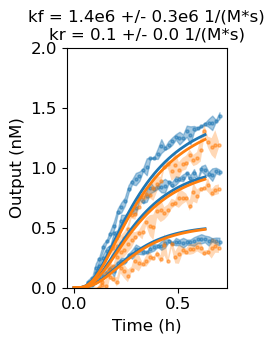

In [38]:
data1 = pd.read_csv(data_dir + "UW_CascadeModel_Natural_Trial1.csv")[0:37]
data2 = pd.read_csv(data_dir + "UW_CascadeModel_Natural_Trial2.csv")[0:37]

RT = 0.593




#Best fit: Fluorescence = 1099.85 * [F2t(nM)] + 322.2
x1 = [time_to_seconds(i) for i in list(data1['Time'].values)]
x2 = [time_to_seconds(i) for i in list(data2['Time'].values)]


# from calibration curves collected for each reporter during the same experiment
fit1 = [624.49, 1751.13]
fit2 = [294.56, 581.53]


start = time_to_seconds("0:00:00")
offset1 = 250
offset2 = 240





conditions = {
'F0(mm)_lowStock: 1.9 nM, F1mm_lowStock: 3.92 nM, F2mm_lowStock: 3.6 nM, R1_S2_500nM: 5.0 nM, X1_100nM: 0.52 nM' : ['M20', 'N20', 'O20'],
'F0(mm)_lowStock: 1.9 nM, F1mm_lowStock: 3.92 nM, F2mm_lowStock: 3.6 nM, R1_S2_500nM: 5.0 nM, X1_100nM: 1.03 nM' : ['M21', 'N21', 'O21'],
'F0(mm)_lowStock: 1.9 nM, F1mm_lowStock: 3.92 nM, F2mm_lowStock: 3.6 nM, R1_S2_500nM: 5.0 nM, X1_100nM: 1.55 nM' : ['M22', 'N22', 'O22']
}


levels = list(conditions.keys())

format_dict = {'point_size': 10, 'point_opacity': 0.2, 'fill_opacity': 0.4}



curves = []
stdDev = []
for i,level in enumerate(levels):
    curves += [[get_average_curve(start, offset1, level, x1, data1, conditions, fit1)[0],[1e-9*np.array(c) for c in get_average_curve(start, offset1, level, x1, data1, conditions, fit1)[1]]]]
    stdDev += [get_average_curve(start, offset1, level, x1, data1, conditions, fit1)[2]]


for i,level in enumerate(levels):
    curves += [[get_average_curve(start, offset2, level, x2, data2, conditions, fit2)[0],[1e-9*np.array(c) for c in get_average_curve(start, offset2, level, x2, data2, conditions, fit2)[1]]]]
    stdDev += [get_average_curve(start, offset2, level, x2, data2, conditions, fit2)[2]]

to_fit = [c[1] for c in curves]
x_trunc1 = curves[0][0]
x_trunc2 = curves[4][0]

# Convert time from seconds to hours for plotting
x_th1 = [i/3600 for i in x_trunc1]
x_h1 = [i/3600 for i in x1]
x_th2 = [i/3600 for i in x_trunc2]
x_h2 = [i/3600 for i in x2]

dG = [-9.96,-10.11,-10.19]
scale = 12

f2c1 = 2.0
f2c2 = 2.0

f1c1 = 2.0
f1c2 = 1.8

f0c1 = 1.9
f0c2 = 1.8

# Initial parameters
y_init0 = [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    0.0,  # Initial concentration of F1t (2)
    0.0,  # Initial concentration of F0t (3)
    0.0,  # Initial concentration of X1  (4)
    2*f2c1,  # Initial concentration of F2. (5)
    2*f1c1,  # Initial concentration of F1. (6)
    f0c1,  # Initial concentration of F0. (7)
    0.0,  # Initial concentration of W0. (8)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]

y_init1 = [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    0.0,  # Initial concentration of F1t (2)
    0.0,  # Initial concentration of F0t (3)
    0.52,  # Initial concentration of X1  (4)
    2*f2c1,  # Initial concentration of F2. (5)
    2*f1c1,  # Initial concentration of F1. (6)
    f0c1,  # Initial concentration of F0. (7)
    0.0,  # Initial concentration of W0. (8)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]

y_init2 = [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    0.0,  # Initial concentration of F1t (2)
    0.0,  # Initial concentration of F0t (3)
    1.03,  # Initial concentration of X1  (4)
    2*f2c1,  # Initial concentration of F2. (5)
    2*f1c1,  # Initial concentration of F1. (6)
    f0c1,  # Initial concentration of F0. (7)
    0.0,  # Initial concentration of W0. (8)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]

y_init3 = [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    0.0,  # Initial concentration of F1t (2)
    0.0,  # Initial concentration of F0t (3)
    1.55,  # Initial concentration of X1  (4)
    2*f2c1,  # Initial concentration of F2. (5)
    2*f1c1,  # Initial concentration of F1. (6)
    f0c1,  # Initial concentration of F0. (7)
    0.0,  # Initial concentration of W0. (8)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]

y_init4 = [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    0.0,  # Initial concentration of F1t (2)
    0.0,  # Initial concentration of F0t (3)
    0.0,  # Initial concentration of X1  (4)
    2*f2c2,  # Initial concentration of F2. (5)
    2*f1c2,  # Initial concentration of F1. (6)
    f0c2,  # Initial concentration of F0. (7)
    0.0,  # Initial concentration of W0. (8)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]

y_init5 = [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    0.0,  # Initial concentration of F1t (2)
    0.0,  # Initial concentration of F0t (3)
    0.52,  # Initial concentration of X1  (4)
    2*f2c2,  # Initial concentration of F2. (5)
    2*f1c2,  # Initial concentration of F1. (6)
    f0c2,  # Initial concentration of F0. (7)
    0.0,  # Initial concentration of W0. (8)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]

y_init6 = [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    0.0,  # Initial concentration of F1t (2)
    0.0,  # Initial concentration of F0t (3)
    1.03,  # Initial concentration of X1  (4)
    2*f2c2,  # Initial concentration of F2. (5)
    2*f1c2,  # Initial concentration of F1. (6)
    f0c2,  # Initial concentration of F0. (7)
    0.0,  # Initial concentration of W0. (8)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]

y_init7 = [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    0.0,  # Initial concentration of F1t (2)
    0.0,  # Initial concentration of F0t (3)
    1.55,  # Initial concentration of X1  (4)
    2*f2c2,  # Initial concentration of F2. (5)
    2*f1c2,  # Initial concentration of F1. (6)
    f0c2,  # Initial concentration of F0. (7)
    0.0,  # Initial concentration of W0. (8)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]




krep = krep_nat
kf2 = kf2mm
kr2 = kr2mm
kf1 = kf1mm
kr1 = kr1mm

dGi = dG[0]

fixed_params_list = [
    {'y0': y_init1,'kf1' : kf1, 'kr1' : kr1, 'kf2' : kf2, 'kr2' : kr2, 'krep': krep,'scale':scale, 'dG' : dGi},
    {'y0': y_init2,'kf1' : kf1, 'kr1' : kr1, 'kf2' : kf2, 'kr2' : kr2, 'krep': krep,  'scale':scale, 'dG' : dGi},
    {'y0': y_init3, 'kf1' : kf1, 'kr1' : kr1, 'kf2' : kf2, 'kr2' : kr2,'krep': krep,  'scale':scale, 'dG' : dGi},

    {'y0': y_init5,'kf1' : kf1, 'kr1' : kr1, 'kf2' : kf2, 'kr2' : kr2, 'krep': krep,'scale':scale, 'dG' : dGi},
    {'y0': y_init6,'kf1' : kf1, 'kr1' : kr1, 'kf2' : kf2, 'kr2' : kr2, 'krep': krep,  'scale':scale, 'dG' : dGi},
    {'y0': y_init7, 'kf1' : kf1, 'kr1' : kr1, 'kf2' : kf2, 'kr2' : kr2,'krep': krep,  'scale':scale, 'dG' : dGi},
]
initial_k = 2e5


x_list  = [x_trunc1,x_trunc1,x_trunc1,x_trunc2,x_trunc2,x_trunc2]

fits = []
for out in range(6):
  inds = list(range(len(fixed_params_list[0:6])))
  inds.remove(out)

  fixed = slc(fixed_params_list[0:6], inds)
  x = slc(x_list[0:6], inds)
  fitting = slc(to_fit[0:6], inds)
  res = fit_model(model_cascade, x, fitting, initial_k, fixed)
  fits += [res[0]]

res = np.array(fits).flatten()
kf_mean = np.mean(fits)
n = len(fits)
kf_se = np.sqrt((n - 1) / n * np.sum((fits - kf_mean)**2))
fitted_kf = kf_mean
error = kf_se
r_error = error/(math.exp(-dGi/RT))

fitted_kr =  fitted_kf / np.exp(-dGi/(0.592))
print("Fitted kf:", fitted_kf)
print('Error: ', error)

kf0mm = fitted_kf
kr0mm = fitted_kr


plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(1,1, figsize = (2,3))
fig.subplots_adjust(hspace=0.5)
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)


for i in range(0,len(fixed_params_list)//2):
    curve = np.array([1e9*np.array(c) for c in curves[i][1]])
    std = np.array(stdDev[i])
    ax.plot(x_h1,[i*1e9 for i in model_cascade(fitted_kf, x1, fixed_params_list[i])], color=color_scheme[0], linewidth=line)
    ax.scatter(x_th1, curve, color = color_scheme[0], s = size, alpha = alph)
    ax.fill_between(x_th1,(curve - std),(curve + std),color = color_scheme[0], alpha = 0.4)
for i in range(len(fixed_params_list)//2,len(fixed_params_list)):
    curve = np.array([1e9*np.array(c) for c in curves[i][1]])
    std = np.array(stdDev[i])
    ax.plot(x_h2,[i*1e9 for i in model_cascade(fitted_kf, x2, fixed_params_list[i])], color = color_scheme[1], linewidth=line)
    ax.scatter(x_th2,curve, color = color_scheme[1], s=size, alpha = alph)
    ax.fill_between(x_th2,(curve - std), (curve + std), color = color_scheme[1], alpha=.3, edgecolor=None)



ax.set_xlabel('Time (h)')
ax.set_ylabel('Output (nM)')
ax.set_ylim(0,2.0)

ax.set_title(f"kf = {round(fitted_kf*1e-6,1)}e6 +/- {round(error*1e-6,1)}e6 1/(M*s)\nkr = {round(fitted_kr*1e0,1)} +/- {round(r_error*1e0,1)} 1/(M*s)", fontsize=12)

plt.savefig('Figures/F0(mm)Detailed.svg', dpi = 600, transparent=True)
plt.show()


# Non-Natural Cascade

## F2 Level

Fitted kf: 3184408.7334963246
Error:  151175.3610023704


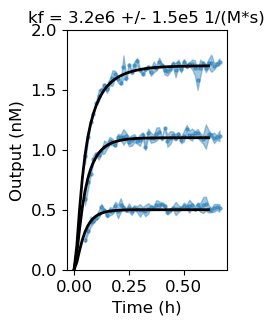

In [39]:
data1 = pd.read_csv(data_dir + "UW_CascadeModel_NN.csv")[0:50]
RT = 0.593

conditions = {
'F1nnt_200nM: 0.5 nM, F2nn_200nM: 2.0 nM, R1nn_1uM: 13.74 nM' : ['E3', 'F3', 'G3'],
'F1nnt_200nM: 1.0 nM, F2nn_200nM: 2.0 nM, R1nn_1uM: 13.74 nM' : ['E4', 'F4', 'G4'],
'F1nnt_200nM: 1.5 nM, F2nn_200nM: 2.0 nM, R1nn_1uM: 13.74 nM' : ['E5', 'F5', 'G5'],
              }

# from calibration curve collected for each reporter during the same experiment
x1 = [time_to_seconds(i) for i in list(data1['Time'].values)]



fit1 =  [399.89, 1509.54]

start = time_to_seconds("0:00:00")
offset1 = 180


levels = list(conditions.keys())

format_dict = {'point_size': 10, 'point_opacity': 0.2, 'fill_opacity': 0.4}



curves = []
stdDev = []
for i,level in enumerate(levels):
    curves += [[get_average_curve(start, offset1, level, x1, data1, conditions, fit1)[0],[1e-9*np.array(c) for c in get_average_curve(start, offset1, level, x1, data1, conditions, fit1)[1]]]]
    stdDev += [get_average_curve(start, offset1, level, x1, data1, conditions, fit1)[2]]


to_fit = [np.array(c[1]) for c in curves]
x_trunc1 = curves[0][0]

# Convert time from seconds to hours for plotting
x_th = [i/3600 for i in x_trunc1]
x_h = [i/3600 for i in x1]

scale = 17
f2c = 2.6
f1c = 2.4
f0c = 2.6

# Initial parameters


y_init1 = [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    0.50,  # Initial concentration of F1t (2)
    f2c,  # Initial concentration of F2. (5)
    0.0   # Initial concentration of W2. (10)
]

y_init2 = [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    1.1,  # Initial concentration of F1t (2)
    f2c,  # Initial concentration of F2. (5)
    0.0   # Initial concentration of W2. (10)
]

y_init3 = [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    1.7,  # Initial concentration of F1t (2)
    f2c,  # Initial concentration of F2. (5)
    0.0   # Initial concentration of W2. (10)
]

krep = krep_nn
dGi = -np.inf

fixed_params_list = [
    {'y0': y_init1, 'krep': krep,'scale':scale, 'dG' : dGi},
    {'y0': y_init2, 'krep': krep,  'scale':scale, 'dG' : dGi},
    {'y0': y_init3, 'krep': krep,  'scale':scale, 'dG' : dGi},
]
initial_k = 1e6

x_list = [x_trunc1, x_trunc1, x_trunc1]
fits = []
for out in range(len(fixed_params_list)):
  inds = list(range(len(fixed_params_list)))
  inds.remove(out)

  fixed = slc(fixed_params_list, inds)
  x = slc(x_list, inds)
  fitting = slc(to_fit, inds)
  res = fit_model(model_two_step, x, fitting, initial_k, fixed)
  fits += [res[0]]

res = np.array(fits).flatten()
kf_mean = np.mean(fits)
n = len(fits)
kf_se = np.sqrt((n - 1) / n * np.sum((fits - kf_mean)**2))
fitted_kf = kf_mean
error = kf_se

print("Fitted kf:", fitted_kf)
print('Error: ', error)

kf2nn = fitted_kf


plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(1,1, figsize = (2,3))
fig.subplots_adjust(hspace=0.5)
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)


for i in range(0,len(fixed_params_list)):
    curve = np.array([1e9*np.array(c) for c in curves[i][1]])
    std = np.array(stdDev[i])
    ax.plot(x_h,[i*1e9 for i in model_two_step(fitted_kf, x1, fixed_params_list[i])], color='black', linewidth=line)
    ax.scatter(x_th, curve, color = color_scheme[0], s = size, alpha = alph)
    ax.fill_between(x_th,(curve - std),(curve + std),color = color_scheme[0], alpha = 0.4)


ax.set_xlabel('Time (h)')
ax.set_ylabel('Output (nM)')
ax.set_ylim(0,2.0)

ax.set_title(f"kf = {round(fitted_kf*1e-6,1)}e6 +/- {round(error*1e-5,1)}e5 1/(M*s)", fontsize=12)

plt.savefig('Figures/F2NNDetailed.svg', dpi = 600, transparent=True)
plt.show()


## F1 level

Fitted kf: 13778342.652080858
Error:  2298025.287725015


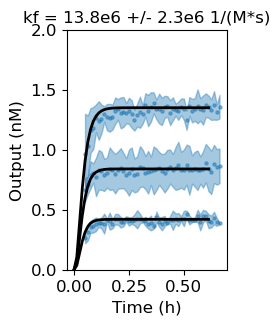

In [40]:
data1 = pd.read_csv(data_dir + "UW_CascadeModel_NN.csv")[0:50]

RT = 0.593

conditions = {
'F0nnt_200nM: 0.5 nM, F1nn_200nM: 2.0 nM, F2nn_200nM: 4.0 nM, R1nn_1uM: 13.74 nM' : ['E8', 'F8', 'G8'],
'F0nnt_200nM: 1.0 nM, F1nn_200nM: 2.0 nM, F2nn_200nM: 4.0 nM, R1nn_1uM: 13.74 nM' : ['E9', 'F9', 'G9'],
'F0nnt_200nM: 1.5 nM, F1nn_200nM: 2.0 nM, F2nn_200nM: 4.0 nM, R1nn_1uM: 13.74 nM' : ['E10', 'F10', 'G10'],
              }

# from calibration curve collected for each reporter during the same experiment
x1 = [time_to_seconds(i) for i in list(data1['Time'].values)]


fit1 =  [399.89, 1509.54]

start = time_to_seconds("0:00:00")
offset1 = 180

levels = list(conditions.keys())

format_dict = {'point_size': 10, 'point_opacity': 0.2, 'fill_opacity': 0.4}



curves = []
stdDev = []
for i,level in enumerate(levels):
    curves += [[get_average_curve(start, offset1, level, x1, data1, conditions, fit1)[0],[1e-9*np.array(c) for c in get_average_curve(start, offset1, level, x1, data1, conditions, fit1)[1]]]]
    stdDev += [get_average_curve(start, offset1, level, x1, data1, conditions, fit1)[2]]


to_fit = [np.array(c[1]) for c in curves]
x_trunc1 = curves[0][0]

# Convert time from seconds to hours for plotting
x_th = [i/3600 for i in x_trunc1]
x_h = [i/3600 for i in x1]


scale = 17
f2c = 2.6
f1c = 2.4
f0c = 2.6


# Initial parameters


y_init1 = [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    0.0,  # Initial concentration of F1t (2)
    0.42,  # Initial concentration of F0t (3)
    2*f2c,  # Initial concentration of F2. (5)
    f1c,  # Initial concentration of F1. (6)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]

y_init2 = [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    0,  # Initial concentration of F1t (2)
    0.84,  # Initial concentration of F0t (3)
    2*f2c,  # Initial concentration of F2. (5)
    f1c,  # Initial concentration of F1. (6)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]

y_init3 = [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    0,  # Initial concentration of F1t (2)
    1.35,  # Initial concentration of F0t (3)
    2*f2c,  # Initial concentration of F2. (5)
    f1c,  # Initial concentration of F1. (6)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]



dGi = -np.inf
krep = krep_nn
kf2 = kf2nn
kr2 = 0

fixed_params_list = [
    {'y0': y_init1, 'kf2' : kf2, 'kr2': kr2, 'krep': krep,'scale':scale, 'dG' : dGi},
    {'y0': y_init2, 'kf2' : kf2,'kr2': kr2, 'krep': krep,  'scale':scale, 'dG' : dGi},
    {'y0': y_init3, 'kf2' : kf2,'kr2': kr2, 'krep': krep,  'scale':scale, 'dG' : dGi},


]
initial_k = 2e6

x_list = [x_trunc1, x_trunc1, x_trunc1]

fits = []
for out in range(3):
  inds = list(range(len(fixed_params_list[0:6])))
  inds.remove(out)

  fixed = slc(fixed_params_list[0:6], inds)
  x = slc(x_list[0:6], inds)
  fitting = slc(to_fit[0:6], inds)
  res = fit_model(model_three_step, x, fitting, initial_k, fixed)
  fits += [res[0]]


res = np.array(fits).flatten()
kf_mean = np.mean(fits)
n = len(fits)
kf_se = np.sqrt((n - 1) / n * np.sum((fits - kf_mean)**2))
fitted_kf = kf_mean
error = kf_se

print("Fitted kf:", fitted_kf)
print('Error: ', error)

kf1nn = fitted_kf


plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(1,1, figsize = (2,3))
fig.subplots_adjust(hspace=0.5)
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)


for i in range(0,len(fixed_params_list)):
    curve = np.array([1e9*np.array(c) for c in curves[i][1]])
    std = np.array(stdDev[i])
    ax.plot(x_h,[i*1e9 for i in model_three_step(fitted_kf, x1, fixed_params_list[i])], color='black', linewidth=line)
    ax.scatter(x_th, curve, color = color_scheme[0], s = size, alpha = alph)
    ax.fill_between(x_th,(curve - std),(curve + std),color = color_scheme[0], alpha = 0.4)

ax.set_xlabel('Time (h)')
ax.set_ylabel('Output (nM)')
ax.set_ylim(0,2.0)

ax.set_title(f"kf = {round(fitted_kf*1e-6,1)}e6 +/- {round(error*1e-6,1)}e6 1/(M*s)", fontsize=12)

plt.savefig('Figures/F1(nn)Detailed.svg', dpi = 600, transparent=True)
plt.show()

## F0 Level

Fitted kf: 2694710.1998098674
Error:  70818.20891927916


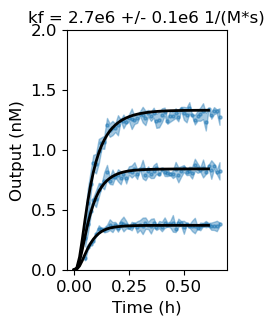

In [41]:
data1 = pd.read_csv(data_dir + "UW_CascadeModel_NN.csv")[0:50]

RT = 0.593


conditions = {
'F0nn_200nM: 2.0 nM, F1nn_200nM: 4.0 nM, F2nn_200nM: 4.0 nM, R1nn_1uM: 13.74 nM, X1nn_200nM: 0.5 nM' : ['E13', 'F13', 'G13'],
'F0nn_200nM: 2.0 nM, F1nn_200nM: 4.0 nM, F2nn_200nM: 4.0 nM, R1nn_1uM: 13.74 nM, X1nn_200nM: 1.0 nM' : ['E14', 'F14', 'G14'],
'F0nn_200nM: 2.0 nM, F1nn_200nM: 4.0 nM, F2nn_200nM: 4.0 nM, R1nn_1uM: 13.74 nM, X1nn_200nM: 1.5 nM' : ['E15', 'F15', 'G15'],
}

x1 = [time_to_seconds(i) for i in list(data1['Time'].values)]


# from calibration curve collected for each reporter during the same experiment
fit1 =  [399.89, 1509.54]



start = time_to_seconds("0:00:00")
offset1 = 180

levels = list(conditions.keys())

format_dict = {'point_size': 10, 'point_opacity': 0.2, 'fill_opacity': 0.4}



curves = []
stdDev = []
for i,level in enumerate(levels):
    curves += [[get_average_curve(start, offset1, level, x1, data1, conditions, fit1)[0],[1e-9*np.array(c) for c in get_average_curve(start, offset1, level, x1, data1, conditions, fit1)[1]]]]
    stdDev += [get_average_curve(start, offset1, level, x1, data1, conditions, fit1)[2]]


to_fit = [np.array(c[1]) for c in curves]
x_trunc1 = curves[0][0]

# Convert time from seconds to hours for plotting
x_th = [i/3600 for i in x_trunc1]
x_h = [i/3600 for i in x1]




scale = 17
f2c = 2.6
f1c = 2.4
f0c = 2.6


# Initial parameters


y_init1 = [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    0.0,  # Initial concentration of F1t (2)
    0.0,  # Initial concentration of F0t (3)
    0.37,  # Initial concentration of X1  (4)
    2*f2c,  # Initial concentration of F2. (5)
    2*f1c,  # Initial concentration of F1. (6)
    f0c,  # Initial concentration of F0. (7)
    0.0,  # Initial concentration of W0. (8)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]

y_init2 = [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    0.0,  # Initial concentration of F1t (2)
    0.0,  # Initial concentration of F0t (3)
    0.84,  # Initial concentration of X1  (4)
    2*f2c,  # Initial concentration of F2. (5)
    2*f1c,  # Initial concentration of F1. (6)
    f0c,  # Initial concentration of F0. (7)
    0.0,  # Initial concentration of W0. (8)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]

y_init3 = [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    0.0,  # Initial concentration of F1t (2)
    0.0,  # Initial concentration of F0t (3)
    1.33,  # Initial concentration of X1  (4)
    2*f2c,  # Initial concentration of F2. (5)
    2*f1c,  # Initial concentration of F1. (6)
    f0c,  # Initial concentration of F0. (7)
    0.0,  # Initial concentration of W0. (8)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]





dGi = -np.inf
krep = krep_nn
kf2 = kf2nn
kr2 = 0
kf1 = kf1nn
kr1 = 0

fixed_params_list = [
    {'y0': y_init1,'kf1' : kf1, 'kr1' : kr1, 'kf2' : kf2, 'kr2': kr2, 'krep': krep,'scale':scale, 'dG' : dGi},
    {'y0': y_init2,'kf1' : kf1, 'kr1' : kr1, 'kf2' : kf2, 'kr2': kr2, 'krep': krep,  'scale':scale, 'dG' : dGi},
    {'y0': y_init3, 'kf1' : kf1, 'kr1' : kr1, 'kf2' : kf2, 'kr2': kr2, 'krep': krep,  'scale':scale, 'dG' : dGi},

]




x_list  = [x_trunc1,x_trunc1,x_trunc1]

fits = []
for out in range(3):
  inds = list(range(len(fixed_params_list[0:6])))
  inds.remove(out)

  fixed = slc(fixed_params_list[0:6], inds)
  x = slc(x_list[0:6], inds)
  fitting = slc(to_fit[0:6], inds)
  res = fit_model(model_cascade, x, fitting, initial_k, fixed)
  fits += [res[0]]


res = np.array(fits).flatten()
kf_mean = np.mean(fits)
n = len(fits)
kf_se = np.sqrt((n - 1) / n * np.sum((fits - kf_mean)**2))
fitted_kf = kf_mean
error = kf_se

print("Fitted kf:", fitted_kf)
print('Error: ', error)

kf1nn = fitted_kf


plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(1,1, figsize = (2,3))
fig.subplots_adjust(hspace=0.5)
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)


for i in range(0,len(fixed_params_list)):
    curve = np.array([1e9*np.array(c) for c in curves[i][1]])
    std = np.array(stdDev[i])
    ax.plot(x_h,[i*1e9 for i in model_cascade(fitted_kf, x1, fixed_params_list[i])], color='black', linewidth=line)
    ax.scatter(x_th, curve, color = color_scheme[0], s = size, alpha = alph)
    ax.fill_between(x_th,(curve - std),(curve + std),color = color_scheme[0], alpha = 0.4)


ax.set_xlabel('Time (h)')
ax.set_ylabel('Output (nM)')
ax.set_ylim(0,2.0)

ax.set_title(f"kf = {round(fitted_kf*1e-6,1)}e6 +/- {round(error*1e-6,1)}e6 1/(M*s)", fontsize=12)

plt.savefig('Figures/F0NNDetailed.svg', dpi = 600, transparent=True)
plt.show()
